# 多元线性回归

当我们讲到线性模型的时候，其实指的是我们的coefficients，在很多时候都是\beta，是线性组合

### 数据集

In [2]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
import numpy as np

In [ ]:
housevalue = fch()

x = pd.DataFrame(housevalue.data)
y = housevalue.target
x.shape, y.shape, x.head(), y, y.min(), y.max()

In [5]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
x.columns = housevalue.feature_names

In [7]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### 训练集测试集分割

`切记恢复索引`

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=420)
# 恢复索引
for i in [xtrain, xtest]:
    i.index = range(i.shape[0])

xtrain.head(), xtrain.shape

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  4.1776      35.0  4.425172   1.030683      5380.0  3.368817     37.48   
 1  5.3261      38.0  6.267516   1.089172       429.0  2.732484     37.53   
 2  1.9439      26.0  5.768977   1.141914       891.0  2.940594     36.02   
 3  2.5000      22.0  4.916000   1.012000       733.0  2.932000     38.57   
 4  3.8250      34.0  5.036765   1.098039      1134.0  2.779412     33.91   
 
    Longitude  
 0    -122.19  
 1    -122.30  
 2    -119.08  
 3    -121.31  
 4    -118.35  ,
 (14448, 8))

### 数据标准化

In [9]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler().fit(xtrain)
xtrain.iloc[:, :] = stand.transform(xtrain.iloc[:, :])
xtest.iloc[:, :] = stand.transform(xtest.iloc[:, :])

In [10]:
xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.159626,0.510191,-0.400386,-0.137366,3.507724,0.020972,0.865304,-1.309257
1,0.761674,0.748787,0.330494,-0.018110,-0.886084,-0.031039,0.888745,-1.364222
2,-1.011288,-0.205595,0.132718,0.089427,-0.476078,-0.014029,0.180835,0.244749
3,-0.719778,-0.523722,-0.205669,-0.175459,-0.616297,-0.014731,1.376312,-0.869538
4,-0.025209,0.430659,-0.157760,-0.000031,-0.260426,-0.027203,-0.808364,0.609516


In [11]:
xtest.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-1.104753,1.066914,-0.511652,-0.136703,0.136268,0.079532,-0.784923,0.644494
1,-1.229252,0.033001,-0.134304,-0.004412,-0.257763,0.000232,1.713859,-1.054420
2,0.158263,-1.159976,0.067546,-0.106206,1.238492,-0.018691,0.705907,-1.034433
3,-0.443104,1.862231,-0.103741,-0.025160,0.209040,-0.049979,1.005949,-1.459161
4,0.328629,0.589723,-0.195970,-0.235342,-0.107783,0.010500,-0.789611,0.739433


### 建模

In [12]:
reg = LR().fit(xtrain, ytrain)
yhat = reg.predict(xtest)
yhat.max(), yhat.min()
# 发现yhat的范围比真实值大

(7.146198214270825, -0.6528439725035562)

In [13]:
reg.coef_

array([ 8.34330242e-01,  1.28392315e-01, -2.71751685e-01,  3.07236193e-01,
        5.87759764e-04, -4.09677688e-02, -8.81149778e-01, -8.52966760e-01])

In [14]:
[*zip(xtrain.columns, reg.coef_)]

[('MedInc', 0.8343302417471552),
 ('HouseAge', 0.1283923151295832),
 ('AveRooms', -0.2717516851919096),
 ('AveBedrms', 0.3072361927925217),
 ('Population', 0.0005877597637465727),
 ('AveOccup', -0.04096776875874611),
 ('Latitude', -0.8811497776007535),
 ('Longitude', -0.852966760456658)]

# 回归评估指标

### 是否预测准确

In [15]:
# 法一
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat, ytest)

0.5309012639324572

In [16]:
ytest.mean()

2.0819292877906976

In [17]:
# 法二
cross_val_score(reg, x, y, cv = 10, scoring='neg_mean_squared_error').mean()

-0.5509524296956594

### 是否拟合了足够的信息

In [18]:
# 法一
from sklearn.metrics import r2_score
r2_score(ytest, yhat)

0.6043668160178817

In [19]:
# 法二
r2 = reg.score(xtest, ytest)
r2

0.6043668160178817

In [20]:
# 法三
cross_val_score(reg, x, y, cv = 10, scoring='r2').mean()

0.5110068610524554

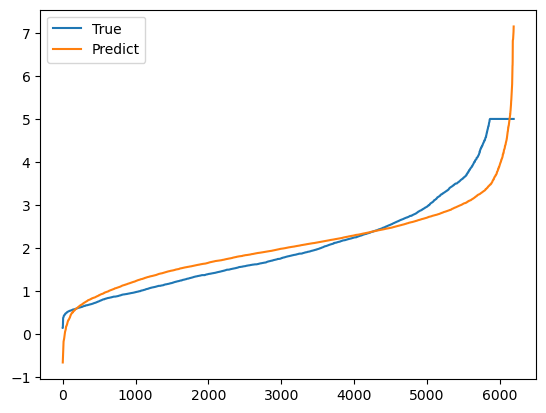

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(len(ytest)), sorted(ytest), label = 'True')
plt.plot(range(len(yhat)), sorted(yhat), label = 'Predict')
plt.legend()
plt.show()

# Multicollinearity

### Ridge Regression

当系数的绝对值变大时， 惩罚项会急剧增大，从而“惩罚”那些过大的系数。

In [22]:
from sklearn.linear_model import  Ridge

In [23]:
ridge = Ridge(alpha=1).fit(xtrain, ytrain)


In [24]:
reg.score(xtest, ytest)
# 和多元线性回归的结果差不多，说明不是多重共线性的问题

0.6043668160178817

In [25]:
alpharange = np.linspace(1, 1001, 100)
ridge, lr = [], []
for alpha in alpharange:
    lrrag = LR().fit(xtrain, ytrain)
    ridgereg = Ridge(alpha=alpha).fit(xtrain, ytrain)
    scorelr = cross_val_score(lrrag, xtest, ytest, cv = 5, scoring='r2').mean()
    scoreridge = cross_val_score(ridgereg, xtest, ytest, cv = 5, scoring='r2').mean()
    ridge.append(scoreridge)
    lr.append(scorelr)


0.5933800757954306 112.1111111111111


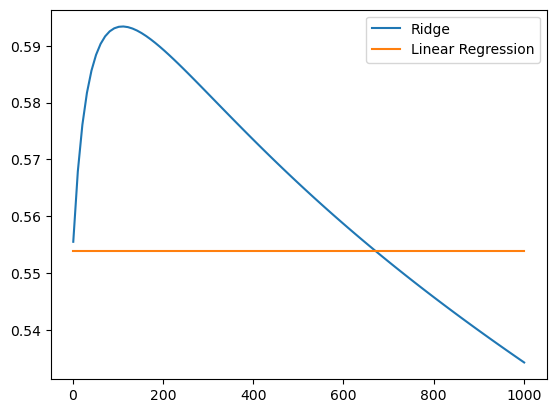

In [26]:

print(max(ridge), alpharange[ridge.index(max(ridge))])
plt.plot(alpharange, ridge, label = 'Ridge')
plt.plot(alpharange, lr, label = 'Linear Regression')
plt.legend()
plt.show()

# 仅有一点点多重共线性问题

In [27]:
ridge112 = Ridge(alpha=112.1111111111111).fit(xtrain, ytrain)
ridge112.score(xtest, ytest)

0.602498670378733

0.5933837436239963 110.1010101010101


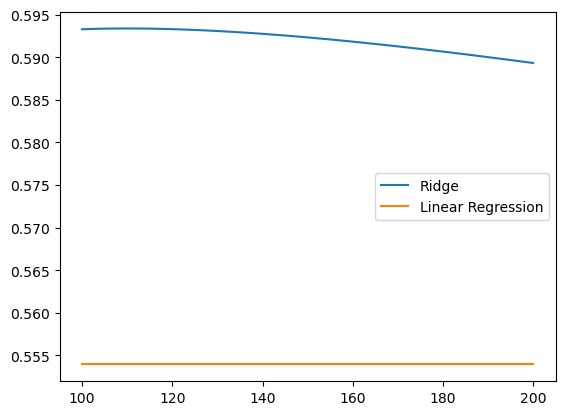

In [28]:
# 细化
alpharange = np.linspace(100, 200, 100)
ridge, lr = [], []
for alpha in alpharange:
    lrrag = LR().fit(xtrain, ytrain)
    ridgereg = Ridge(alpha=alpha).fit(xtrain, ytrain)
    scorelr = cross_val_score(lrrag, xtest, ytest, cv = 5, scoring='r2').mean()
    scoreridge = cross_val_score(ridgereg, xtest, ytest, cv = 5, scoring='r2').mean()
    ridge.append(scoreridge)
    lr.append(scorelr)


print(max(ridge), alpharange[ridge.index(max(ridge))])
plt.plot(alpharange, ridge, label = 'Ridge')
plt.plot(alpharange, lr, label = 'Linear Regression')
plt.legend()
plt.show()

In [29]:
# var
alpharange = np.linspace(1, 1001, 100)
ridge, lr = [], []
for alpha in alpharange:
    lrrag = LR().fit(xtrain, ytrain)
    ridgereg = Ridge(alpha=alpha).fit(xtrain, ytrain)
    scorelr = cross_val_score(lrrag, xtest, ytest, cv = 5, scoring='r2').mean()
    scoreridge = cross_val_score(ridgereg, xtest, ytest, cv = 5, scoring='r2').mean()
    ridge.append(scoreridge)
    lr.append(scorelr)


### 选择最佳正则化参数


#### 岭迹图 

不推荐

In [30]:
from sklearn import linear_model

# 创造希尔伯特矩阵
Hilbert = 1./(np.arange(1, 11)) + np.arange(1, 10)[:, np.newaxis]
Hilbert, Hilbert.shape

(array([[ 2.        ,  1.5       ,  1.33333333,  1.25      ,  1.2       ,
          1.16666667,  1.14285714,  1.125     ,  1.11111111,  1.1       ],
        [ 3.        ,  2.5       ,  2.33333333,  2.25      ,  2.2       ,
          2.16666667,  2.14285714,  2.125     ,  2.11111111,  2.1       ],
        [ 4.        ,  3.5       ,  3.33333333,  3.25      ,  3.2       ,
          3.16666667,  3.14285714,  3.125     ,  3.11111111,  3.1       ],
        [ 5.        ,  4.5       ,  4.33333333,  4.25      ,  4.2       ,
          4.16666667,  4.14285714,  4.125     ,  4.11111111,  4.1       ],
        [ 6.        ,  5.5       ,  5.33333333,  5.25      ,  5.2       ,
          5.16666667,  5.14285714,  5.125     ,  5.11111111,  5.1       ],
        [ 7.        ,  6.5       ,  6.33333333,  6.25      ,  6.2       ,
          6.16666667,  6.14285714,  6.125     ,  6.11111111,  6.1       ],
        [ 8.        ,  7.5       ,  7.33333333,  7.25      ,  7.2       ,
          7.16666667,  7.1428571

In [31]:
E = np.ones(9)
E, E.shape

(array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), (9,))

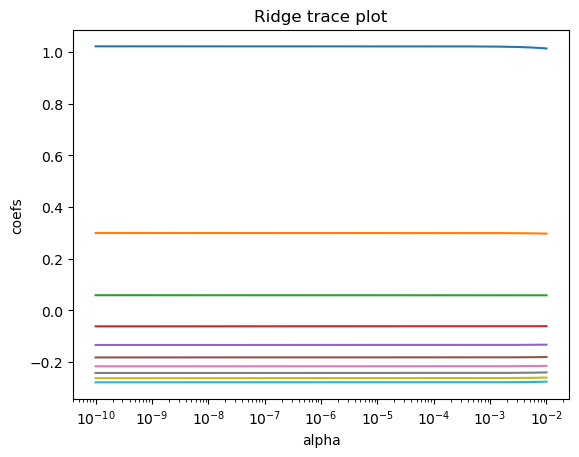

In [32]:
# 计算横坐标
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# 建模，获取每一个正则化取值下的系数组合
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(Hilbert, E)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())[::-1] #将横坐标逆转
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.title('Ridge trace plot')
plt.axis('tight')
plt.show()

#### GridSearchCV


重要参数

| 参数      | 含义                                                                                                                                                                                                                                                                  |
| :-------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| alphas    | 需要测试的正则化参数的取值元组                                                                                                                                                                                                                                    |
| scoring   | 用来 进行交叉验证的模型评估指标，默认是 $R^2$，可自行调整                                                                                                                                                                                                                   |
| store_cv_values | 是否保存每次交叉验证的结果，默认False                                                                                                                                                                                                                   |
| cv        | 交叉验证的模式，默认是None，表示默认留一交叉验证。可以输入KFold对象和StratifiedKFold对象来进行交叉验证。注意，仅仅当cv为None时，每次交叉验证的结果才可被保存下来。当cv有值存在（不是None）时，store_cv_values无法被设定为True |

重要属性

| 属性        | 含义                                                               |
| :---------- | :----------------------------------------------------------------- |
| alpha\_     | 查看交叉验证选中的alpha                                          |
| cv\_values\_ | 调用所有交叉验证的结果，只有当store_cv_values=True的时候才能调用，因此返回的结构是(n_samples, n_alphas) |

重要接口

| 接口  | 含义                                |
| :---- | :---------------------------------- |
| score | 调用Ridge类不进行交叉验证的情况下返回的R平方 |

In [33]:

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(1, 1001, 100)}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid.fit(xtrain, ytrain)

print("Best alpha:", grid.best_params_)



Best alpha: {'alpha': 1}


In [34]:
results = pd.DataFrame(grid.cv_results_)
print(results[['param_alpha', 'mean_test_score', 'std_test_score', 
               'split0_test_score', 'split1_test_score', 'split2_test_score',
               'split3_test_score', 'split4_test_score']])


   param_alpha  mean_test_score  std_test_score  split0_test_score  \
0            1         0.604425        0.019599           0.625159   
1          101         0.603966        0.018325           0.623685   
2          201         0.601874        0.017487           0.620993   
3          301         0.598958        0.016903           0.617702   
4          401         0.595645        0.016469           0.614141   
5          501         0.592166        0.016130           0.610484   
6          601         0.588650        0.015849           0.606828   
7          701         0.585169        0.015606           0.603226   
8          801         0.581760        0.015389           0.599705   
9          901         0.578443        0.015189           0.596278   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  
0           0.617197           0.587114           0.617505           0.575153  
1           0.616944           0.586095           0.615161           

### Lasso Regression

可以将某些系数压缩为0，可以用于进行特征选择

In [35]:
from sklearn.linear_model import Lasso, LinearRegression

lrreg = LinearRegression().fit(xtrain, ytrain)
lrreg.coef_.tolist()

[0.8343302417471552,
 0.1283923151295832,
 -0.2717516851919096,
 0.3072361927925217,
 0.0005877597637465727,
 -0.04096776875874611,
 -0.8811497776007535,
 -0.852966760456658]

In [36]:
lrreg.score(xtest, ytest)

0.6043668160178817

In [37]:
ridgereg = Ridge(alpha=100000).fit(xtrain, ytrain)
ridgereg.coef_.tolist()

[0.09923322367656365,
 0.017218685864444826,
 0.019034636126251874,
 -0.00765928060319468,
 -0.0027619712737122636,
 -0.0034036021677309133,
 -0.021563558303481056,
 -0.008099856624331858]

In [38]:
ridgereg.score(xtest, ytest)

0.1223058740097106

In [39]:
lasso = Lasso(alpha=0).fit(xtrain, ytrain)

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.770e+03, tolerance: 1.917e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [40]:
lasso = Lasso().fit(xtrain, ytrain)
# 不给alpha的取值就不会警告
lasso.coef_.tolist()
# 系数都被缩小为0了，说明1这个正则化强度太强了

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [41]:
lasso = Lasso(alpha=0.001).fit(xtrain, ytrain)
lasso.coef_.tolist()


[0.8289227099280785,
 0.1286979523349944,
 -0.2576915274495252,
 0.293099514748687,
 0.0,
 -0.039870733497678224,
 -0.871087804881538,
 -0.8421076278378835]

In [42]:
lasso.score(xtest, ytest)

0.6041820784046763

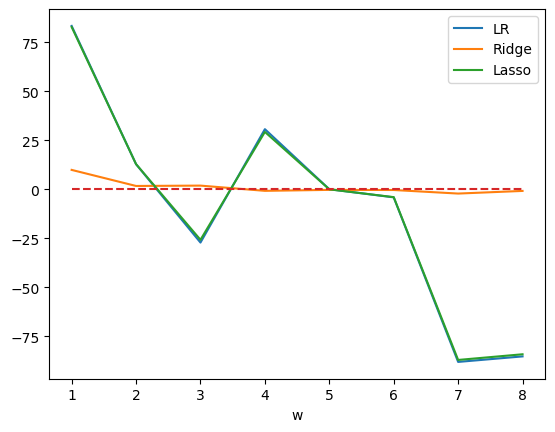

In [43]:
plt.plot(range(1, 9), (lrreg.coef_ * 100).tolist(), label = 'LR')
plt.plot(range(1, 9), (ridgereg.coef_ * 100).tolist(), label = 'Ridge')
plt.plot(range(1, 9), (lasso.coef_ * 100).tolist(), label = 'Lasso')
plt.plot(range(1, 9), [0] * 8, linestyle = '--')
plt.xlabel('w')
plt.legend()
plt.show()

#### 选择最佳正则化系数

In [44]:
from sklearn.linear_model import LassoCV

In [45]:
alpharange = np.logspace(-10, -2, 200, base = 10)
lasso_ = LassoCV(alphas=alpharange
                 , cv = 5
                 ).fit(xtrain, ytrain)


In [46]:
lasso_.alpha_
# 被选择的最佳正则化参数

0.0015702901247293774

In [47]:
lasso_.mse_path_
# 所有交叉验证的结果

array([[0.52486704, 0.49770832, 0.55992444, 0.50652539, 0.55643135],
       [0.52388456, 0.49654603, 0.55890531, 0.5053951 , 0.55648267],
       [0.52301426, 0.49552381, 0.55800023, 0.50440036, 0.55666724],
       [0.52227761, 0.49467567, 0.5572348 , 0.50355648, 0.55694584],
       [0.52165479, 0.49396472, 0.55657968, 0.50283082, 0.5572927 ],
       [0.52112327, 0.49337292, 0.55602318, 0.50221089, 0.55768514],
       [0.52067275, 0.49287612, 0.5555449 , 0.50167532, 0.55810653],
       [0.52028673, 0.49246247, 0.55513747, 0.50121394, 0.5585438 ],
       [0.51995866, 0.49211455, 0.55478567, 0.50081773, 0.55898643],
       [0.51967632, 0.49182478, 0.55448309, 0.50047307, 0.55942583],
       [0.51943569, 0.49158048, 0.55422415, 0.50017605, 0.55985763],
       [0.5192276 , 0.49137551, 0.55399898, 0.49991634, 0.56027651],
       [0.51904841, 0.49120472, 0.55380409, 0.49969023, 0.5606782 ],
       [0.51889502, 0.49106022, 0.55363648, 0.49949434, 0.5610631 ],
       [0.5187614 , 0.49093864, 0.

In [48]:
lasso_.mse_path_.shape

(200, 5)

In [49]:
lasso_.mse_path_.mean(axis=1)

array([0.52909131, 0.52824273, 0.52752118, 0.52693808, 0.52646454,
       0.52608308, 0.52577512, 0.52552888, 0.52533261, 0.52517662,
       0.5250548 , 0.52495899, 0.52488513, 0.52482983, 0.52478798,
       0.52475756, 0.52473655, 0.52472281, 0.5247147 , 0.524711  ,
       0.52471092, 0.52471337, 0.52471779, 0.52472358, 0.52473043,
       0.52473781, 0.52474564, 0.52475355, 0.52476147, 0.52476928,
       0.52477698, 0.52478427, 0.52479133, 0.52479786, 0.52480431,
       0.52481013, 0.52481583, 0.52482102, 0.52482596, 0.52483059,
       0.52483485, 0.52483883, 0.52484252, 0.52484596, 0.52484912,
       0.52485202, 0.5248547 , 0.52485716, 0.52485942, 0.52486151,
       0.52486341, 0.52486516, 0.52486675, 0.52486823, 0.52486956,
       0.5248708 , 0.52487192, 0.52487295, 0.52487389, 0.52487475,
       0.52487553, 0.52487625, 0.5248769 , 0.5248775 , 0.52487805,
       0.52487855, 0.524879  , 0.52487942, 0.5248798 , 0.52488015,
       0.52488046, 0.52488075, 0.52488101, 0.52488125, 0.52488

In [50]:
# 最佳正则化系数下的系数
lasso_.coef_

array([ 0.82583823,  0.12898579, -0.24961531,  0.28501239,  0.        ,
       -0.03927036, -0.86527073, -0.83586062])

In [51]:
lasso_.score(xtest, ytest)

0.6040337271934113

In [52]:
# 用lasspcv
lscv = LassoCV(eps = 1e-20
               , n_alphas= 100
               , cv = 5).fit(xtrain, ytrain)

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1613: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.038e+00, tolerance: 1.518e+00
  model = cd_fast.enet_coordinate_descent_gram(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scal

In [53]:
lscv.alpha_

0.001873282475267021

In [54]:
lscv.alphas_.shape

(100,)

In [55]:
lscv.score(xtest, ytest)

0.6039445395477893

In [56]:
lscv.coef_

array([ 0.82419034,  0.12913746, -0.24530723,  0.28070212,  0.        ,
       -0.03895105, -0.86219961, -0.83255921])

In [57]:
[*zip(xtrain.columns, lscv.coef_)]

[('MedInc', 0.8241903390716742),
 ('HouseAge', 0.12913746108622073),
 ('AveRooms', -0.24530723422977962),
 ('AveBedrms', 0.28070212086799057),
 ('Population', 0.0),
 ('AveOccup', -0.03895105297029216),
 ('Latitude', -0.8621996089440707),
 ('Longitude', -0.832559212167235)]

# 线性模型与非线性模型

| | 线性模型 | 非线性模型 |
| :-- | :----------------------------------------------- | :--------------------------------------------- |
| **代表模型** | 线性回归, 逻辑回归, 弹性网, 感知机 | 决策树, 树的集成模型, 使用高斯核 |
| **模型特点** | 模型简单, 运行速度快 | 模型复杂, 效果好, 但速度慢 |
| **数学特征:** | | |
| 回归 | 自变量是一次项 | 自变量都不是一次项 |
| 分类 | 决策边界上的自变量都是一次项 | 决策边界上的自变量都不是一次项 |
| **可视化:** | | |
| 回归 | 拟合出的图像是一条直线 | 拟合出的图像不是一条直线 |
| 分类 | 决策边界在二维平面是一条直线 | 决策边界在二维平面不是一条直线 |
| **擅长数据类型** | 主要是线性数据, 线性可分数据 | 所有数据 |


### 线性回归和决策树回归在非线性数据集上的表现

In [58]:
from sklearn.tree import DecisionTreeRegressor

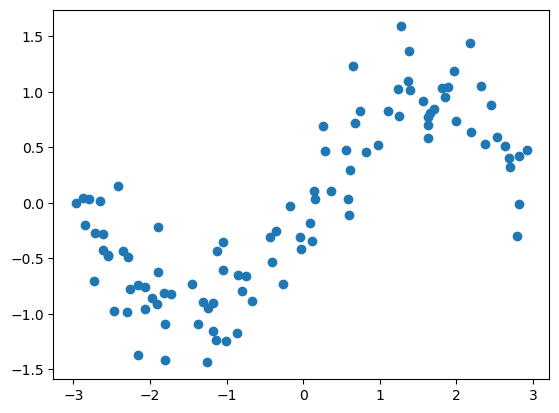

In [59]:
rnd = np.random.RandomState(42)
x = rnd.uniform(-3, 3, size = 100)
y = np.sin(x) + rnd.normal(size = len(x)) / 3
plt.scatter(x, y)
plt.show()

In [60]:
x = x.reshape(-1, 1)
x.shape
# sklearn只接受二维以上的数组

(100, 1)

In [61]:
# 使用原数据建模
linear = LinearRegression().fit(x, y)
tree = DecisionTreeRegressor(random_state=0).fit(x, y)

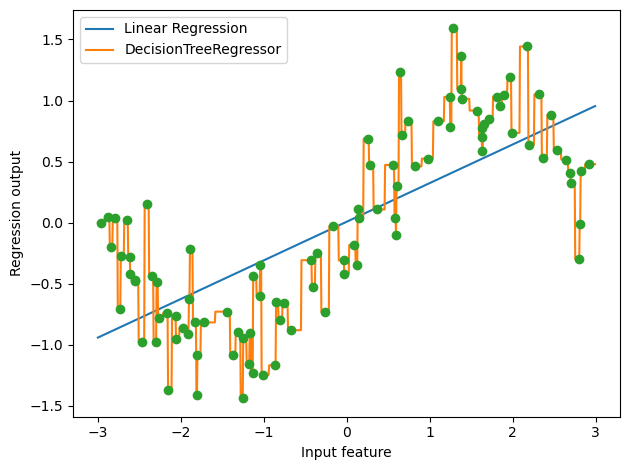

In [62]:
fig, ax1 = plt.subplots(1)

# 测试数据
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

ax1.plot(line, linear.predict(line), label = 'Linear Regression')
ax1.plot(line, tree.predict(line), label = 'DecisionTreeRegressor')


# 原数据
ax1.plot(x[:, 0], y, 'o')
ax1.set_xlabel('Input feature')
ax1.set_ylabel('Regression output')
ax1.legend()
plt.tight_layout()
plt.show()


# 一个欠拟合一个过拟合

### 离散化：帮助线性模型解决非线性问题

In [63]:
from sklearn.preprocessing import KBinsDiscretizer

In [64]:
# 将数据分箱

# 独热编码
# 返回一个稀疏矩阵，每一列都是一个分好的类别
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
x_binned = enc.fit_transform(x)


d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [65]:

x_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [66]:
pd.DataFrame(x_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# 使用分箱后的数据进行模型训练
linear_ = LinearRegression().fit(x_binned, y)
tree_ = DecisionTreeRegressor(random_state=0).fit(x_binned, y)

In [ ]:
linear_.predict(line) # line 作为测试集
# 在sklearn中，测试集和训练集结构要一致

ValueError: X has 1 features, but LinearRegression is expecting 10 features as input.

In [70]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = enc.transform(line)

In [72]:
linear_.predict(line_binned).shape# line_binned 作为测试集

(1000,)

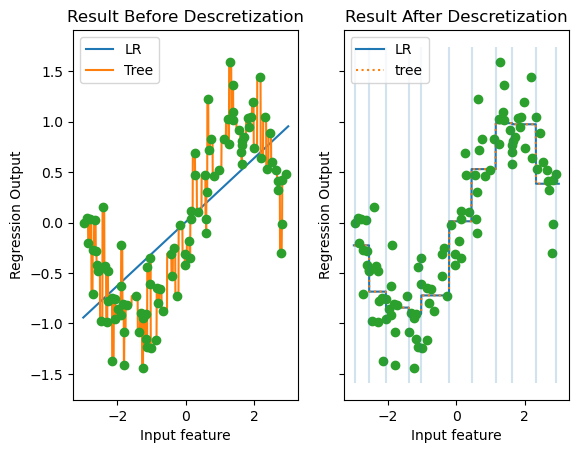

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2
                               , sharey=True
                               )

# 原始数据上建模的结果可视化
ax1.plot(line, linear.predict(line), label = 'LR')
ax1.plot(line, tree.predict(line), label = 'Tree')
ax1.plot(x[:, 0], y, 'o')
ax1.legend()
ax1.set_xlabel('Input feature')
ax1.set_ylabel('Regression Output')
ax1.set_title('Result Before Descretization')

ax2.plot(line, linear_.predict(line_binned), label = 'LR', linestyle = '-')
ax2.plot(line, tree_.predict(line_binned), label = 'tree', linestyle = ':')
ax2.plot(x[:, 0], y, 'o')

# 绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] # x轴
           , *plt.gca().get_ylim() # y 轴的上限和下限
           ,  alpha = 0.2
           )

ax2.legend()
ax2.set_xlabel('Input feature')
ax2.set_ylabel('Regression Output')
ax2.set_title('Result After Descretization')
plt.show()



In [83]:
linear.score(line, np.sin(line))

0.6800102369793313

In [ ]:
linear_.score(line_binned, np.sin(line))

0.944133075051055

In [84]:
tree.score(line, np.sin(line))

0.8478082863491422

In [85]:
tree_.score(line_binned, np.sin(line))

0.944133075051055

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


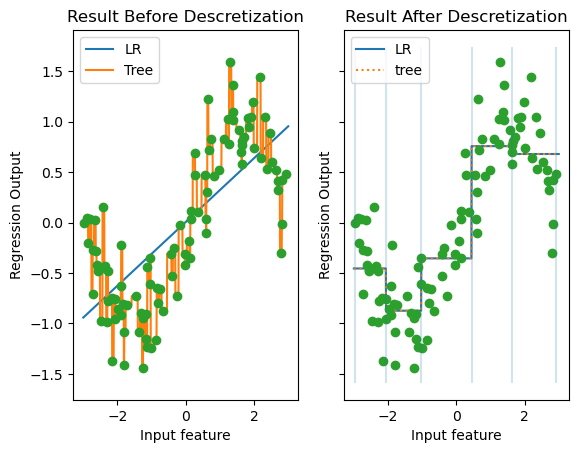

In [86]:
# 箱子数的影响
enc = KBinsDiscretizer(n_bins=5, encode='onehot')
x_binned = enc.fit_transform(x)
line_binned = enc.transform(line)
linear = LinearRegression().fit(x, y)
tree = DecisionTreeRegressor(random_state=0).fit(x, y)
linear_ = LinearRegression().fit(x_binned, y)
tree_ = DecisionTreeRegressor(random_state=0).fit(x_binned, y)

fig, (ax1, ax2) = plt.subplots(ncols=2
                               , sharey=True
                               )

# 原始数据上建模的结果可视化
ax1.plot(line, linear.predict(line), label = 'LR')
ax1.plot(line, tree.predict(line), label = 'Tree')
ax1.plot(x[:, 0], y, 'o')
ax1.legend()
ax1.set_xlabel('Input feature')
ax1.set_ylabel('Regression Output')
ax1.set_title('Result Before Descretization')

ax2.plot(line, linear_.predict(line_binned), label = 'LR', linestyle = '-')
ax2.plot(line, tree_.predict(line_binned), label = 'tree', linestyle = ':')
ax2.plot(x[:, 0], y, 'o')

# 绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] # x轴
           , *plt.gca().get_ylim() # y 轴的上限和下限
           ,  alpha = 0.2
           )

ax2.legend()
ax2.set_xlabel('Input feature')
ax2.set_ylabel('Regression Output')
ax2.set_title('Result After Descretization')
plt.show()

In [89]:
linear_.score(line_binned, np.sin(line)), tree_.score(line_binned, np.sin(line))

# 效果没有10箱的效果好

(0.8649069759304867, 0.8649069759304868)

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be ch

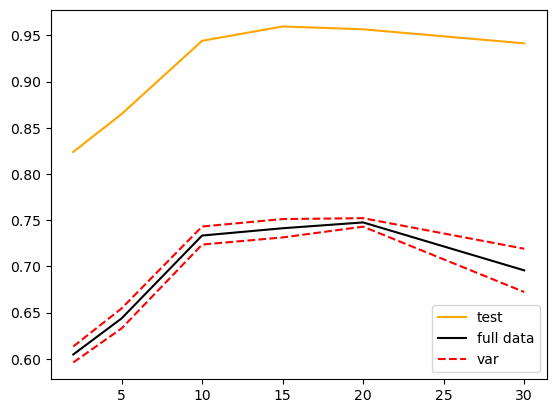

In [90]:
# 选取最优箱数
pred, score, var = [], [], []
binsrange = [2,5,10,15,20,30]

for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i, encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(x)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = cross_val_score(LinearR_, X_binned, y, cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))

plt.figure()
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--", label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

# 多项式回归

### `PolynomialFeatures`

增加自变量的次数

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
x = np.arange(1, 4).reshape(-1, 1)
x

array([[1],
       [2],
       [3]])

In [96]:
poly2 = PolynomialFeatures(degree=2)
x2 = poly2.fit_transform(x)
x2, x2.shape

(array([[1., 1., 1.],
        [1., 2., 4.],
        [1., 3., 9.]]),
 (3, 3))

In [104]:
poly3 = PolynomialFeatures(degree = 3)
x3 = poly3.fit_transform(x)
x3, x3.shape

(array([[ 1.,  1.,  1.,  1.],
        [ 1.,  2.,  4.,  8.],
        [ 1.,  3.,  9., 27.]]),
 (3, 4))

In [ ]:
poly30 = PolynomialFeatures(degree = 3, include_bias=False)
x30 = poly30.fit_transform(x)
x30, x30.shape
# 不带截距的

(array([[ 1.,  1.,  1.],
        [ 2.,  4.,  8.],
        [ 3.,  9., 27.]]),
 (3, 3))

In [106]:
rnd = np.random.RandomState(888)
y = rnd.randn(3)
y

array([-0.17620087,  0.18887636,  0.82674718])

In [107]:
LinearRegression().fit(x3, y).coef_

array([-3.88578059e-16,  4.66455823e-02,  8.68920331e-02,  8.25079327e-03])

In [ ]:
LinearRegression().fit(x3, y).intercept_
# 可见并不知道哪个是截距

-0.3179892823443657

In [113]:
LinearRegression(fit_intercept=False).fit(x3, y).coef_


array([-0.25898096, -0.06153634,  0.14590035, -0.00158393])

In [114]:
LinearRegression(fit_intercept=False).fit(x3, y).intercept_

0.0

In [115]:
#若有两个特征
x = np.arange(6).reshape(3, 2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
PolynomialFeatures(degree=2).fit_transform(x)
# 分别对应x_0, x_1, x_2, x_1^2, x_1*x_2. x_2^2

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
PolynomialFeatures(degree=3).fit_transform(x)
# x_0, x_1, x_2, x_3, x_1^2, x_1*x_2, x_2^2, x_1^3, x_1^2*x_2, x_1*x_2^2, x_2^3

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
PolynomialFeatures(degree=2, interaction_only=True).fit_transform(x)
# x_0, x_1, x_2, x_1*x_2

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [ ]:
# 更高维度的原始特征矩阵
x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [120]:
PolynomialFeatures(degree=3).fit_transform(x).shape

(3, 20)

### 多项式回归处理非线性问题

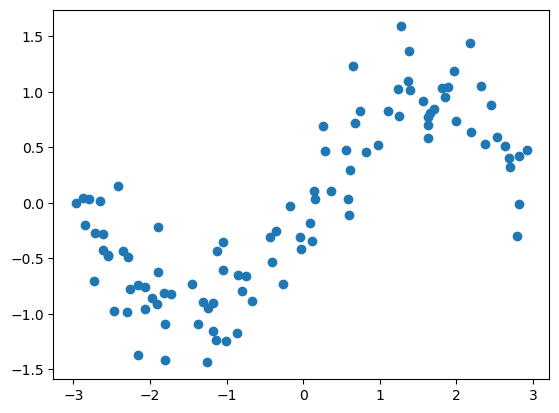

In [122]:
rnd = np.random.RandomState(42)
x = rnd.uniform(-3, 3, size = 100)
y = np.sin(x) + rnd.normal(size = len(x)) / 3
plt.scatter(x, y)
plt.show()

In [123]:
x = x.reshape(-1, 1)

In [139]:
test = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1 )

In [140]:
linear = LinearRegression().fit(x, y)
linear.score(x, y)

0.5361526059318595

In [141]:
linear.score(test, np.sin(test))

0.6798093497639441

In [142]:
poly = PolynomialFeatures(degree=5)
x5 = poly.fit_transform(x)
test5 = poly.fit_transform(test)
linear5 = LinearRegression().fit(x5, y)
linear5.score(x5, y)


0.8561679370344799

In [143]:
linear5.score(test5, np.sin(test))

0.9867831363815881

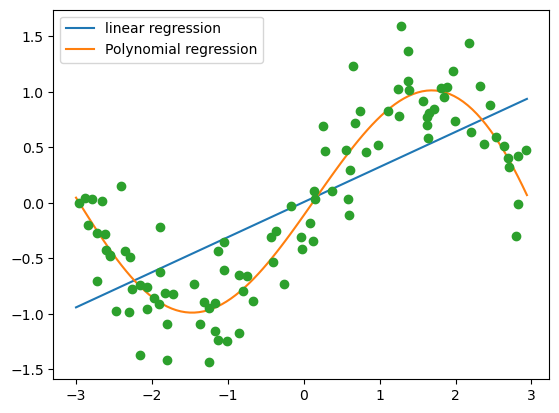

In [144]:
fig, ax1 = plt.subplots(1)

ax1.plot(test, linear.predict(test), label = 'linear regression')
ax1.plot(test, linear5.predict(test5), label = 'Polynomial regression')
ax1.plot(x[:, 0], y, 'o')

ax1.legend()
plt.show()

### 用交叉验证选择最佳的次数

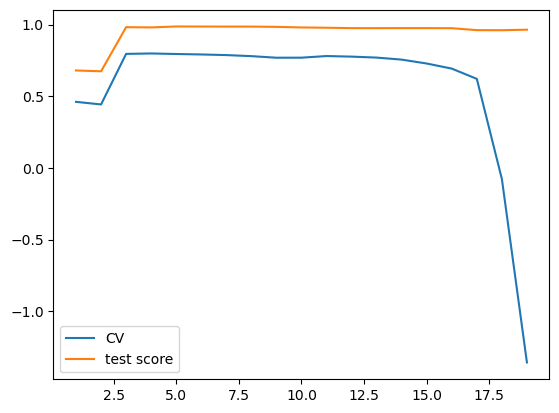

In [ ]:
from sklearn.pipeline import Pipeline
degree = np.arange(1, 20)
score = []
test_score = []
for d in degree:
    pipe = Pipeline([('Poly features', PolynomialFeatures(degree=d))
                    , ('LR', LinearRegression())])
    x_ = PolynomialFeatures(degree=d).fit_transform(x)
    test_ = PolynomialFeatures(degree=d).fit(x).transform(test)
    linear_ = LinearRegression().fit(x_, y)
    s = cross_val_score(pipe, x, y, cv = 10, scoring='r2').mean()
    testsco = linear_.score(test_, np.sin(test))
    score.append(s)
    test_score.append(testsco)

plt.plot(degree, score, label = 'CV')
plt.plot(degree, test_score, label = 'test score')
plt.legend()


### 可解释性（房价数据集）

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
housevalue = fch()

x = pd.DataFrame(housevalue.data)
y = housevalue.target
x.columns = housevalue.feature_names
x.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
poly = PolynomialFeatures(degree=2).fit(x, y)
poly.get_feature_names_out()

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [5]:
x2 = PolynomialFeatures(degree=2).fit_transform(x)

In [6]:
poly2 = LinearRegression().fit(x2, y)
coef = poly2.coef_
coef

array([ 5.91954101e-08, -1.12430253e+01, -8.48898549e-01,  6.44105903e+00,
       -3.15913290e+01,  4.06090494e-04,  1.00386233e+00,  8.70568189e+00,
        5.88063273e+00, -3.13081270e-02,  1.85994678e-03,  4.33020465e-02,
       -1.86142274e-01,  5.72831499e-05, -2.59019490e-03, -1.52505714e-01,
       -1.44242941e-01,  2.11725331e-04, -1.26219006e-03,  1.06115056e-02,
        2.81885224e-06, -1.81716947e-03, -1.00690372e-02, -9.99950175e-03,
        7.26947744e-03, -6.89064354e-02, -6.82365856e-05,  2.68878840e-02,
        8.75089885e-02,  8.22890347e-02,  1.60180952e-01,  5.14264156e-04,
       -8.71911436e-02, -4.37042998e-01, -4.04150582e-01,  2.73779577e-09,
        1.91426762e-05,  2.29529789e-05,  1.46567733e-05,  8.71560978e-05,
        2.13344592e-02,  1.62412938e-02,  6.18867358e-02,  1.08107173e-01,
        3.99077351e-02])

In [7]:
[*zip(poly.get_feature_names_out(), coef)]

[('1', 5.919541008032493e-08),
 ('MedInc', -11.243025295897668),
 ('HouseAge', -0.8488985491022347),
 ('AveRooms', 6.441059034253072),
 ('AveBedrms', -31.591329019961048),
 ('Population', 0.00040609049444581416),
 ('AveOccup', 1.003862334405919),
 ('Latitude', 8.705681892053605),
 ('Longitude', 5.880632730629067),
 ('MedInc^2', -0.031308126985751104),
 ('MedInc HouseAge', 0.001859946782143701),
 ('MedInc AveRooms', 0.04330204646172751),
 ('MedInc AveBedrms', -0.18614227403726616),
 ('MedInc Population', 5.7283149937479086e-05),
 ('MedInc AveOccup', -0.002590194895669223),
 ('MedInc Latitude', -0.1525057139978149),
 ('MedInc Longitude', -0.14424294066170373),
 ('HouseAge^2', 0.00021172533097576053),
 ('HouseAge AveRooms', -0.001262190056487917),
 ('HouseAge AveBedrms', 0.0106115056347429),
 ('HouseAge Population', 2.8188522420008466e-06),
 ('HouseAge AveOccup', -0.0018171694720496448),
 ('HouseAge Latitude', -0.010069037201141669),
 ('HouseAge Longitude', -0.009999501749925142),
 ('AveR

In [8]:
coeff = pd.DataFrame([poly.get_feature_names_out(), coef.tolist()]).T
coeff.columns = ['feature', 'coef']
coeff

,feature,coef
0,1,0.0
1,MedInc,-11.243025
2,HouseAge,-0.848899
3,AveRooms,6.441059
4,AveBedrms,-31.591329
5,Population,0.000406
6,AveOccup,1.003862
7,Latitude,8.705682
8,Longitude,5.880633
9,MedInc^2,-0.031308


In [9]:
coeff.sort_values(by='coef')

,feature,coef
4,AveBedrms,-31.591329
1,MedInc,-11.243025
2,HouseAge,-0.848899
33,AveBedrms Latitude,-0.437043
34,AveBedrms Longitude,-0.404151
12,MedInc AveBedrms,-0.186142
15,MedInc Latitude,-0.152506
16,MedInc Longitude,-0.144243
32,AveBedrms AveOccup,-0.087191
25,AveRooms AveBedrms,-0.068906


1
2
3
4


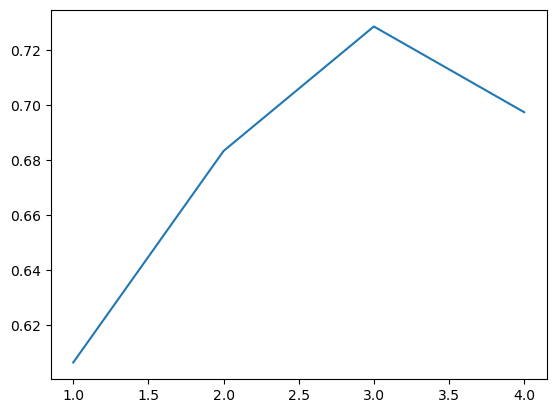

In [10]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
degree = np.arange(1, 5)
score = []
for d in degree:
    pipe = Pipeline([
        ('poly feature', PolynomialFeatures(degree=d))
        , ('lr', LinearRegression())
        ])
    pipe.fit(x, y)
    score.append(pipe.score(x, y))
    print(d)

plt.plot(degree, score)

In [11]:
x3 = PolynomialFeatures(degree=3).fit_transform(x)
x3

array([[ 1.00000000e+00,  8.32520000e+00,  4.10000000e+01, ...,
        -1.75387143e+05,  5.65933749e+05, -1.82613733e+06],
       [ 1.00000000e+00,  8.30140000e+00,  2.10000000e+01, ...,
        -1.75187655e+05,  5.65542397e+05, -1.82568917e+06],
       [ 1.00000000e+00,  7.25740000e+00,  5.20000000e+01, ...,
        -1.75123774e+05,  5.65578076e+05, -1.82658558e+06],
       ...,
       [ 1.00000000e+00,  1.70000000e+00,  1.70000000e+01, ...,
        -1.88463752e+05,  5.79395792e+05, -1.78124164e+06],
       [ 1.00000000e+00,  1.86720000e+00,  1.80000000e+01, ...,
        -1.88619225e+05,  5.80352127e+05, -1.78565356e+06],
       [ 1.00000000e+00,  2.38860000e+00,  1.60000000e+01, ...,
        -1.87921624e+05,  5.78705047e+05, -1.78212344e+06]])

In [12]:
linear3 = LinearRegression().fit(x3, y)
linear3.score(x3, y)

0.7286583857912275

In [13]:
poly3col_name = PolynomialFeatures(degree=3).fit(x).get_feature_names_out()

In [16]:
coef3 = pd.DataFrame([poly3col_name, linear3.coef_]).T
coef3.columns = ['feature', 'coef']
coef3.sort_values(by='coef')

,feature,coef
96,HouseAge AveBedrms AveOccup,-0.011028
43,Latitude Longitude,-0.007837
13,MedInc Population,-0.004337
89,HouseAge AveRooms AveBedrms,-0.00334
139,AveBedrms AveOccup^2,-0.00322
...,...,...
118,AveRooms AveBedrms Latitude,0.004107
162,Latitude^2 Longitude,0.009886
161,Latitude^3,0.010829
44,Longitude^2,0.010956


In [17]:
# 使用集成算法
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RandomForestRegressor().fit(x, y).score(x, y)
# 跑很久，效果好

0.9741559454556301